## Clustering Exercises

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, it can be fun to see how our clustering results map onto color and quality.

In [80]:
import pandas as pd
import numpy as np
import os

data=pd.read_csv('C:\IntelPython3\projects\Wine_Quality_Data.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Question 1

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* How many entries are there for the two colors and range of qualities? 
* Make a histogram plot of the quality for each of the wine colors.

In [81]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [82]:
data['color'].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [83]:
data['quality'].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

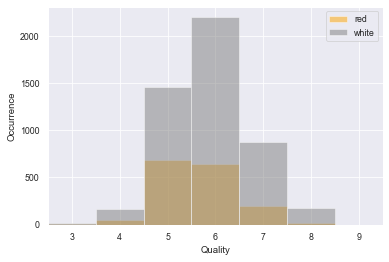

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_context('paper')
sns.set_style('dark')
sns.set_palette('Accent')
red ='orange'
white = 'gray'

# set bins for histogram
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    data['quality'][data.color==color].hist(bins=bin_range,ax=ax,alpha=.5,color=plot_color,label=color)
    
ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);   
ax.grid('off')
   

## Question 2

* Example the correlation and skew of the relevant variables--everything except color and quality.
* Perform any appropriate feature transformations and/or scaling.
* Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [85]:
datax=data.select_dtypes(include=[float])
datax.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [86]:
cor=datax.corr()
for i in range(0,len(cor)):
    cor.iloc[i,i]=0.0

In [87]:
skew=datax.skew()

In [88]:
skew_columns = (datax
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns


chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [89]:
for i in skew_columns.index.tolist():
    data[i]=np.log1p(data[i])


In [90]:
data[i]

0       2.484907
1       3.258097
2       2.772589
3       2.890372
4       2.484907
          ...   
6492    3.218876
6493    4.060443
6494    3.433987
6495    3.044522
6496    3.135494
Name: free_sulfur_dioxide, Length: 6497, dtype: float64

In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scdata=sc.fit_transform(data[datax.columns])

In [92]:
scdata=pd.DataFrame(scdata,columns=[datax.columns])
# datap=data.copy()
datap=pd.concat([scdata,data['quality'],data['color']],axis=1)

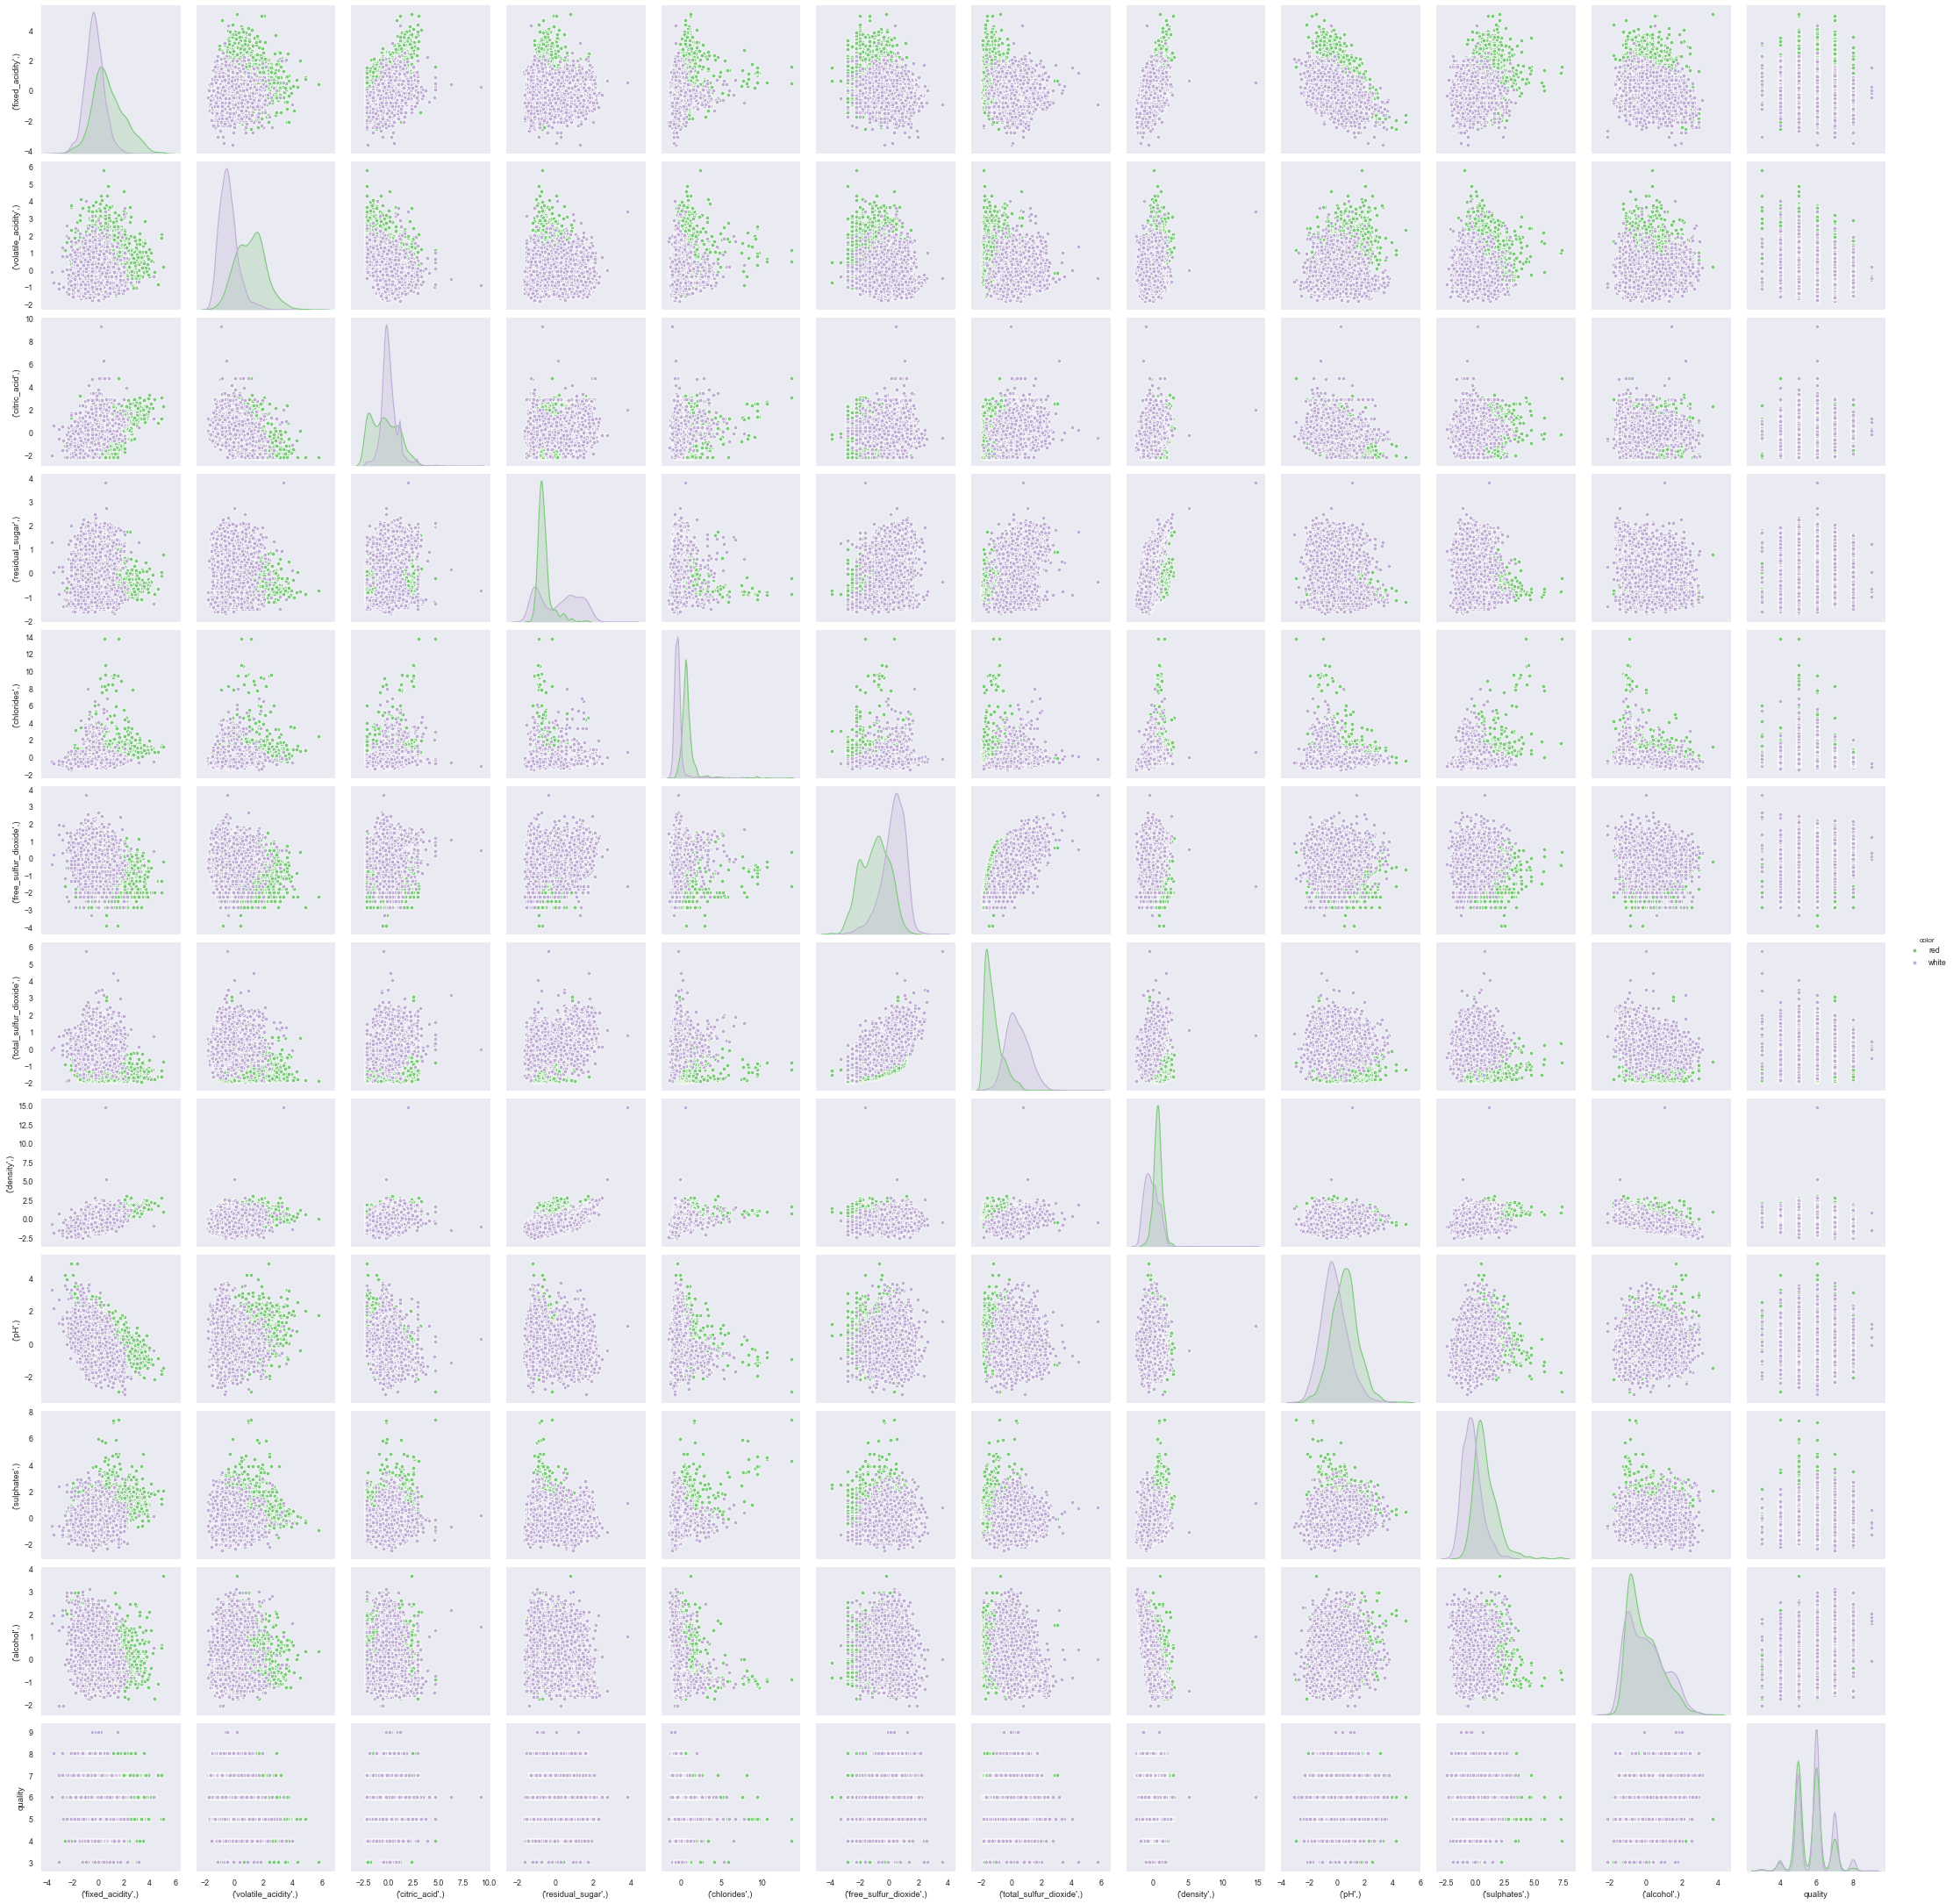

In [15]:
sns.pairplot(datap,hue='color')

## Question 3

* Fit a K-means clustering model with two clusters.
* Examine the clusters by wine color.

In [93]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(scdata)
data['kmeans']=kmeans.predict(scdata)

In [94]:
kmeans1=(data[['color','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))
kmeans1

number
color kmeans        
red   0           23
      1         1576
white 0         4810
      1           88

## Question 4

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

In [95]:
numclus,inertia=[],[]
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scdata)
    numclus.append(i),inertia.append(kmeans.inertia_)


[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'number of clusters')]

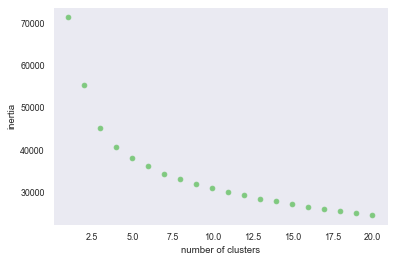

In [96]:
a=plt.axes()
a.scatter(numclus,inertia)
a.set(xLabel='number of clusters',yLabel='inertia')

## Question 5

* Fit an agglomerative clustering model with two clusters.
* Compare the results to those obtained by K-means with regards to wine color.
* Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

In [97]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(scdata)

In [98]:
data['agglomerative'] =clustering.fit_predict(scdata)

In [99]:
aglo=(data[['color','agglomerative']]
 .groupby(['color','agglomerative'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

In [100]:
# compare=pd.concat([kmeans,aglo],axis=1)
# compare
type(kmeans)

sklearn.cluster._kmeans.KMeans

<function matplotlib.pyplot.show(*args, **kw)>

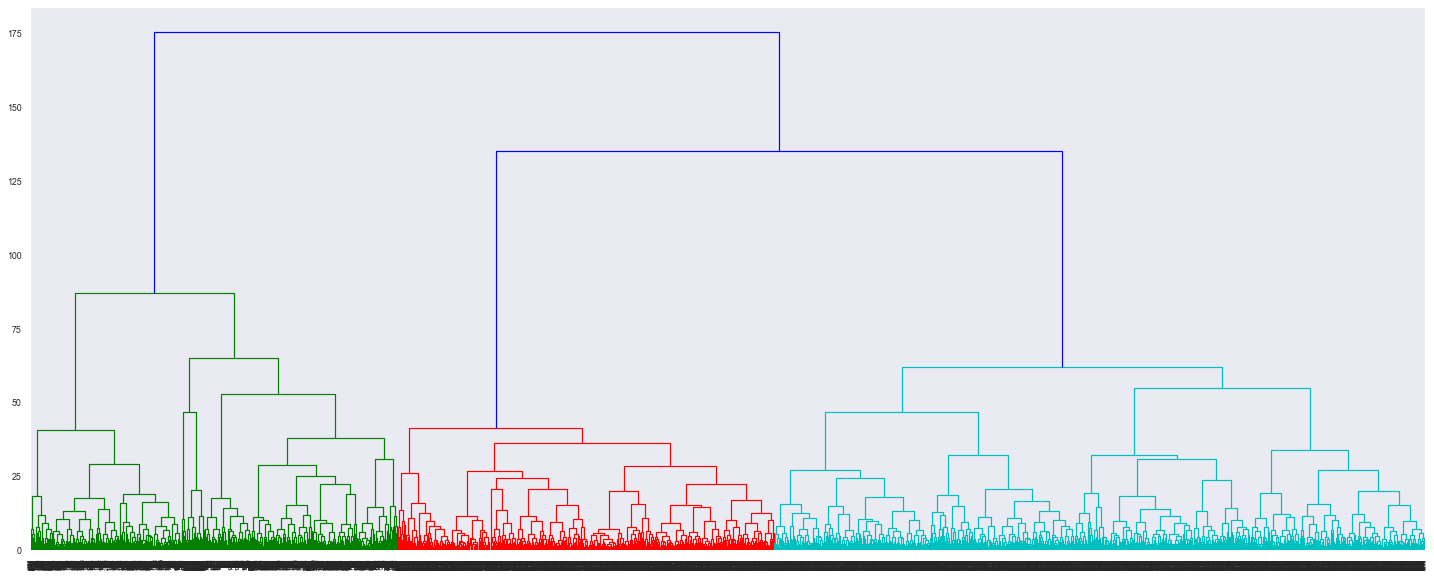

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(scdata, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

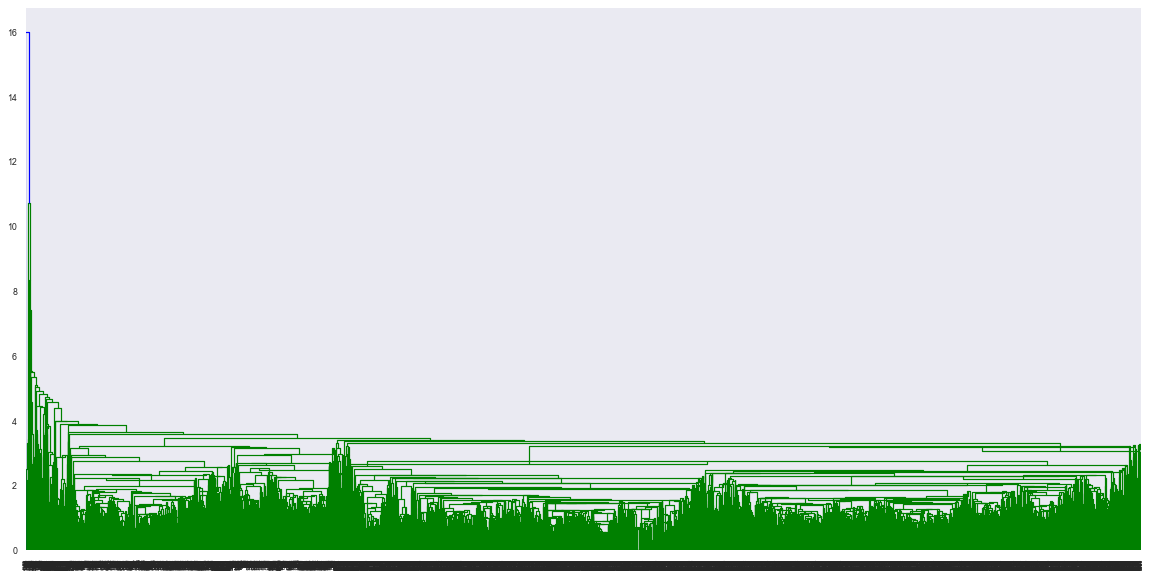

In [102]:
Z = linkage(scdata, 'centroid')
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z)
plt.show

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

* Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
* Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
* For both datasets, using `StratifiedShuffleSplit` with 10 splits, fit 10 Random Forest Classifiers and average out the roc-auc scores.
* Compare the average roc-auc scores for the models using the kmeans clusters as a feature and the one that doesn't use it.2

In [103]:
binaryvar=data['quality'].apply(lambda x:0 if x>7 else 1)

In [104]:
X_with_kmeans=data.drop(columns=['quality','color','agglomerative'])
X_with_kmeans.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'kmeans'],
      dtype='object')

In [105]:
X_without_kmeans=data.drop(columns=['kmeans','color'])
X_without_kmeans.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'agglomerative'],
      dtype='object')

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)
# for trainidx,testidx in sss.split(X_with_kmeans,data['color']):
#     X_train,X_test=X_with_kmeans.loc[trainidx],X_with_kmeans.loc[testidx]
#     Y_train,Y_test=data['color'].loc[trainidx],data['color'].loc[testidx]

In [107]:
# for trainidx,testidx in sss.split(X_without_kmeans,data['color']):
#     X_trainout,X_testout=X_without_kmeans.loc[trainidx],X_without_kmeans.loc[testidx]
#     Y_trainout,Y_testout=data['color'].loc[trainidx],data['color'].loc[testidx]

In [108]:
from sklearn.ensemble import RandomForestClassifier
# from collections import defaultdict
# d=defaultdict(RandomForestClassifier)
# d['clfwith'].fit(X_train, Y_train)
# kmeanspred=d['clfwith'].predict(X_test)
# d['clfwith'].score(X_train, Y_train)

In [109]:
# d['clfwithout']=d['clfwithout'].fit(X_trainout,Y_train)
# woutkmeanspred=d['clfwithout'].predict(X_testout)
# d['clfwithout'].score(X_trainout, Y_trainout)

In [110]:
from sklearn.metrics import roc_auc_score
# Y_test=Y_test.apply(lambda x:1 if x=='white' else 0)
# Y_testout=Y_testout.apply(lambda x:1 if x=='white' else 0)
# kmeanspred=pd.Series(kmeanspred)
# woutkmeanspred=pd.Series(woutkmeanspred)
# kmeanspred=kmeanspred.apply(lambda x:1 if x=='white' else 0)
# woutkmeanspred=woutkmeanspred.apply(lambda x:1 if x=='white' else 0)



In [122]:

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test.values)[:,1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)
    return classification_report(y_test, y_predicted)
y=data['color']

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)

roc_with_kmeans,roc_without_kmeans

(0.999141581632653, 0.9990204081632654)

Let's now explore if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a kmeans algotihm with n clusters. One hot encode it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

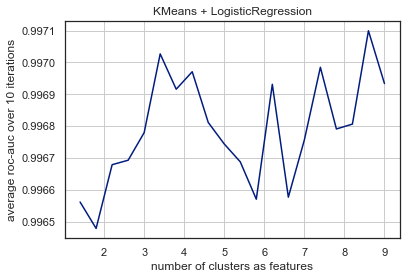

In [121]:
from sklearn.linear_model import LogisticRegression

sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)


def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(scdata)
    km_col = pd.Series(km.predict(scdata))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([scdata, km_cols], axis=1)


estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]


# seaborn styles
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='number of clusters as features',
    ylabel='average roc-auc over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)

In [134]:
np.mean(roc_auc_list)

0.9967897321428572